# Single neural network layer using Flux.jl

In this notebook, we'll move beyond binary classification. We'll try to distinguish between three fruits now, instead of two. We'll attempt this using **multiple** neurons **in a single layer**.

## Read in and process data

We can start by loading the necessary packages and getting our data into working order with similar code we used at the beginning of the previous notebooks, except that now we will combine three different apple data sets, and will add in some grapes to the fruit salad!

In [20]:
# Load apple data in with `readdlm` for each file
apple1, applecolnames1 = readdlm("data/Apple_Golden_1.dat", '\t', header = true)
apple2, applecolnames2 = readdlm("data/Apple_Golden_2.dat", '\t', header = true)
apple3, applecolnames3 = readdlm("data/Apple_Golden_3.dat", '\t', header = true)

# Check that the column names are the same for each apple file
println( applecolnames1 == applecolnames2 == applecolnames3)

true


Since each apple file has columns with the same headers, we know we can concatenate these columns from the different files together:

In [35]:
apples = vcat(apples1, apples2, apples3)

1465×5 Array{Float64,2}:
 94.0  99.0  0.708703  0.641282  0.341998
 94.0  99.0  0.648376  0.553169  0.284163
 94.0  99.0  0.647237  0.553302  0.282579
 94.0  99.0  0.647963  0.55323   0.283689
 94.0  99.0  0.647653  0.554047  0.2846  
 94.0  99.0  0.648491  0.553821  0.28597 
 94.0  99.0  0.647974  0.554518  0.285646
 94.0  99.0  0.649307  0.554399  0.287323
 95.0  99.0  0.648141  0.554708  0.286103
 94.0  99.0  0.64984   0.555665  0.288396
 94.0  99.0  0.648446  0.555576  0.287733
 93.0  99.0  0.709808  0.632473  0.322328
 94.0  99.0  0.650164  0.555766  0.290677
  ⋮                                      
 98.0  99.0  0.53074   0.510047  0.255416
 98.0  99.0  0.532004  0.5109    0.257095
 98.0  99.0  0.531643  0.510807  0.255718
 98.0  99.0  0.532732  0.510599  0.256487
 99.0  99.0  0.531622  0.510178  0.253899
 98.0  99.0  0.53381   0.511457  0.256605
 98.0  99.0  0.534201  0.512264  0.256402
 99.0  99.0  0.535834  0.512988  0.258061
 98.0  99.0  0.536262  0.513907  0.257634
 99.0  99

And now let's build an array called `x_apples` that stores data from the `red` and `blue` columns of `apples`. From `applecolnames1`, we can see that these are the 3rd and 5th columns of `apples`:

In [25]:
applecolnames1[3], applecolnames1[5]

(" red ", " blue")

In [40]:
length(apples[:, 1])

1465

In [41]:
x_apples  = [ [apples[i, 3], apples[i, 5]] for i in 1:length(apples[:, 3]) ]

1465-element Array{Array{Float64,1},1}:
 [0.708703, 0.341998]
 [0.648376, 0.284163]
 [0.647237, 0.282579]
 [0.647963, 0.283689]
 [0.647653, 0.2846]  
 [0.648491, 0.28597] 
 [0.647974, 0.285646]
 [0.649307, 0.287323]
 [0.648141, 0.286103]
 [0.64984, 0.288396] 
 [0.648446, 0.287733]
 [0.709808, 0.322328]
 [0.650164, 0.290677]
 ⋮                   
 [0.53074, 0.255416] 
 [0.532004, 0.257095]
 [0.531643, 0.255718]
 [0.532732, 0.256487]
 [0.531622, 0.253899]
 [0.53381, 0.256605] 
 [0.534201, 0.256402]
 [0.535834, 0.258061]
 [0.536262, 0.257634]
 [0.538111, 0.259346]
 [0.559121, 0.28]    
 [0.539133, 0.259441]

Similarly, let's create arrays called `x_bananas` and `x_grapes`:

In [42]:
# Load data from *.dat files
bananas, bananacolnames = readdlm("data/Banana.dat", '\t', header = true)
grapes1, grapecolnames1 = readdlm("data/Grape_White.dat", '\t', header = true)
grapes2, grapecolnames2 = readdlm("data/Grape_White_2.dat", '\t', header = true)

# Concatenate data from two grape files together
grapes = vcat(grapes1, grapes2)

# Check that column 3 and column 5 refer to the "red" and "blue" columns from each file
println("All column headers are the same: ", bananacolnames == grapecolnames1 == grapecolnames2 == applecolnames1)

# Build x_bananas and x_grapes from bananas and grapes
x_bananas  = [ [bananas[i, 3], bananas[i, 5]] for i in 1:length(bananas[:, 3]) ]
x_grapes = [ [grapes[i, 3], grapes[i, 5]] for i in 1:length(grapes[:, 3]) ]

All column headers are the same: true


980-element Array{Array{Float64,1},1}:
 [0.615648, 0.435313]
 [0.623257, 0.463301]
 [0.622386, 0.463111]
 [0.622452, 0.463373]
 [0.621801, 0.462681]
 [0.622526, 0.463552]
 [0.622833, 0.465057]
 [0.622422, 0.463884]
 [0.61479, 0.435193] 
 [0.623142, 0.464785]
 [0.622403, 0.465021]
 [0.62348, 0.466316] 
 [0.622477, 0.466371]
 ⋮                   
 [0.722031, 0.412562]
 [0.730362, 0.422273]
 [0.722939, 0.414788]
 [0.721564, 0.413433]
 [0.723195, 0.413965]
 [0.722358, 0.413741]
 [0.723049, 0.416157]
 [0.722233, 0.414729]
 [0.722148, 0.41648] 
 [0.721761, 0.416422]
 [0.722839, 0.417423]
 [0.722266, 0.417273]

## One-hot vectors

Now we wish to classify *three* different types of fruit. It is not clear how to code these three types in a single output variable; indeed, in general this is not possible.

Instead, we have the idea of encoding $n$ output types from the classification into *vectors of length $n$*, called "one-hot vectors":

$$
\textrm{apple} = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix};
\quad
\textrm{banana} = \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix};
\quad
\textrm{grape} = \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}.
$$

The term "one-hot" refers to the fact that each vector has a single $1$, and is $0$ otherwise.

Effectively, the first neuron will learn whether or not (1 or 0) the data corresponds to an apple, the second whether or not (1 or 0) it corresponds to a banana, etc.

`Flux.jl` provides an efficient representation for one-hot vectors, using certain features of Julia so that it does not actually store these vectors, which would be a waste of memory; instead `Flux` just records in which position the non-zero element is. To us, however, it looks like all the information is being stored:

In [4]:
using Flux: onehot
onehot(1, 1:3)

INFO: Recompiling stale cache file /Users/jane/.julia/lib/v0.6/Flux.ji for module Flux.


3-element Flux.OneHotVector:
  true
 false
 false

**Exercise**: Make an array `labels` that gives the labels (1, 2 or 3) of each data point. Then use `onehot` to encode the information about the labels as a vector of `OneHotVector`s.

**Solution**:

In [44]:
labels = [ones(length(x_apples)); 2*ones(length(x_bananas)); 3*ones(length(x_grapes))]

2935-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮  
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0

In [9]:
ys = [onehot(label, 1:3) for label in labels]  # onehotbatch(labels, 1:3)

2935-element Array{Flux.OneHotVector,1}:
 Bool[true, false, false]
 Bool[true, false, false]
 Bool[true, false, false]
 Bool[true, false, false]
 Bool[true, false, false]
 Bool[true, false, false]
 Bool[true, false, false]
 Bool[true, false, false]
 Bool[true, false, false]
 Bool[true, false, false]
 Bool[true, false, false]
 Bool[true, false, false]
 Bool[true, false, false]
 ⋮                       
 Bool[false, false, true]
 Bool[false, false, true]
 Bool[false, false, true]
 Bool[false, false, true]
 Bool[false, false, true]
 Bool[false, false, true]
 Bool[false, false, true]
 Bool[false, false, true]
 Bool[false, false, true]
 Bool[false, false, true]
 Bool[false, false, true]
 Bool[false, false, true]

The input data is in `xs` and the one-hot vectors are in `ys`.

## Single layer in Flux

Let's suppose that there are two pieces of input data, as in the previous single neuron notebook. Then the network has 2 inputs and 3 outputs:

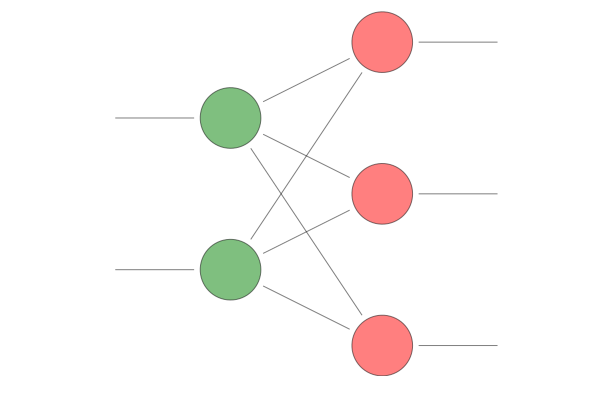

In [45]:
include("draw_neural_net.jl")
draw_network([2, 3])

`Flux` allows us to express this again in a simple way:

In [31]:
using Flux

In [12]:
model = Dense(2, 3, σ)

Dense(2, 3, NNlib.σ)

**Exercise**: Now what do the weights inside `model` look like? How does this compare to the diagram of the network layer above?

**Solution**:

In [13]:
model.W

Tracked 3×2 Array{Float64,2}:
 -0.346216   0.997697  
  0.807468  -0.842982  
 -0.500454  -0.00926963

Each of the 6 lines in the figure denotes a weight of the neuron on the right, taking as input the output of the neuron on the left. These weights are collected in the **matrix** `W`. Note that it seems to be "backwards", since it is designed to multiply vectors of length 2 (the input size):

In [14]:
x = rand(2)
model.W * x

Tracked 3-element Array{Float64,1}:
  0.412919 
  0.0986781
 -0.441607 

The whole `model` object represents a set of three sigmoidal neurons. Again, we can use `model` as a function and apply it to input data to get the model's prediction from that data:

In [16]:
model(x)

Tracked 3-element Array{Float64,1}:
 0.601788
 0.52465 
 0.391358

This is equivalent to the following calculation:

In [18]:
σ.(model.W*x .+ model.b)

Tracked 3-element Array{Float64,1}:
 0.601788
 0.52465 
 0.391358

Note that here we have again used Julia's **broadcasting** capability, in which the function $\sigma$ is applied to each element of the vector `W * x` in turn. This elementwise application of the function is implicit in most of the literature on machine learning, but it is very much clearer to make this explicit, as Julia forces us to do.

## Training the model

Despite the fact that the model is now more complicated than the single neuron from the previous notebook, the beauty of `Flux.jl` is that the rest of the training process **looks exactly the same**!

**Exercise**: Implement training for this model.

**Solution**: 

In [20]:
loss(x, y) = Flux.mse(model(x), y)

loss (generic function with 1 method)

In [21]:
data = zip(xs, ys);

In [22]:
opt = SGD(params(model), 0.01)
# give a list of the parameters that will be modified

(::#71) (generic function with 1 method)

In [23]:
for i in 1:100
    Flux.train!(loss, data, opt)
end

In [24]:
model.W

Tracked 3×2 Array{Float64,2}:
  3.63226  -2.50992
 -2.13991  -6.45277
 -1.88975   9.37147

In [25]:
model.b

Tracked 3-element Array{Float64,1}:
 -2.24797
  2.28474
 -1.97396

**Exercise**: Visualize the result of the learning for each neuron. Since each neuron is sigmoidal, we can get a good idea of the function by just plotting a single contour level where the function takes the value 0.5, using the `contour` function with keyword argument `levels=[0.5, 0.501]`.

In [29]:
plot()

contour!(0:0.01:1, 0:0.01:1, (x,y)->model([x,y]).data[1], levels=[0.5, 0.501], color = cgrad([:blue, :blue]))
contour!(0:0.01:1, 0:0.01:1, (x,y)->model([x,y]).data[2], levels=[0.5,0.501], color = cgrad([:green, :green]))
contour!(0:0.01:1, 0:0.01:1, (x,y)->model([x,y]).data[3], levels=[0.5,0.501], color = cgrad([:red, :red]))

scatter!(first.(x_apples), last.(x_apples), m=:cross, label="apples")
scatter!(first.(x_bananas), last.(x_bananas), m=:circle, label="bananas")
scatter!(first.(x_grapes), last.(x_grapes), m=:square, label="grapes")

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.00 
 
 
 0.25 
 
 
 0.50 
 
 
 0.75 
 
 
 1.00 
 
 
 0.00 
 
 
 0.25 
 
 
 0.50 
 
 
 0.75 
 
 
 1.00 
 
<polyline clip-path="url(#clip8302)" style="stroke:#0000ff; stroke-width:1; stroke-opacity:1; fill:none" points="
 333.706,365.565 334.21,365.013 336.842,362.131 338.749,360.043 339.979,358.696 343.115,355.262 343.288,355.072 346.252,351.827 347.827,350.102 349.389,348.393 
 352.366,345.132 352.525,344.958 355.662,341.524 356.906,340.162 358.798,338.089 361.445,335.191 361.935,334.655 365.071,331.22 365.984,330.221 368.208,327.786 
 370.523,325.251 371.345,324.351 374.481,320.917 375.062,320.28 377.618,317.482 379.601,315.31 380.754,314.048 383.891,310.613 384.14,310.34 387.027,307.179 
 388.68,305.37 390.164,303.744 393.219,300.399 393.301,300.31 396.437,296.875 397.758,295.429 399.574,293.441 402.297,290.459 402.71,290.006 405.847,286.572 
 406.836,285.488 408.984,283.137 411.375,280.518 412.12,279.703 415.257,276.268 415.915,275.548 418.393,272.833 420.454,270.577 421.53,269.399 424.666,265.964 
 424.993,265.607 427.803,262.53 429.532,260.637 430.94,259.095 434.071,255.667 434.076,255.661 437.213,252.226 438.61,250.696 440.349,248.792 443.149,245.726 
 443.486,245.357 446.623,241.923 447.689,240.756 449.759,238.488 452.228,235.785 452.896,235.054 456.032,231.619 456.767,230.815 459.169,228.185 461.306,225.845 
 462.306,224.75 465.442,221.316 465.845,220.875 468.579,217.881 470.384,215.904 471.715,214.447 474.852,211.012 474.923,210.934 477.988,207.578 479.463,205.964 
 481.125,204.143 484.002,200.993 484.262,200.709 487.398,197.274 488.541,196.023 490.535,193.84 493.08,191.053 493.671,190.405 496.808,186.971 497.619,186.082 
 499.944,183.536 502.158,181.112 503.081,180.102 506.218,176.667 506.698,176.142 
 "/>
<polyline clip-path="url(#clip8302)" style="stroke:#0000ff; stroke-width:1; stroke-opacity:1; fill:none" points="
 506.698,176.689 503.581,180.102 502.158,181.66 500.444,183.536 497.619,186.63 497.308,186.971 494.171,190.405 493.08,191.6 491.035,193.84 488.541,196.57 
 487.898,197.274 484.762,200.709 484.002,201.541 481.625,204.143 479.463,206.511 478.488,207.578 475.352,211.012 474.923,211.481 472.215,214.447 470.384,216.452 
 469.079,217.881 465.942,221.316 465.845,221.422 462.805,224.75 461.306,226.392 459.669,228.185 456.767,231.362 456.532,231.619 453.396,235.054 452.228,236.333 
 450.259,238.488 447.689,241.303 447.122,241.923 443.986,245.357 443.149,246.273 440.849,248.792 438.61,251.244 437.713,252.226 434.576,255.661 434.071,256.214 
 431.44,259.095 429.532,261.184 428.303,262.53 425.166,265.964 424.993,266.155 422.03,269.399 420.454,271.125 418.893,272.833 415.915,276.095 415.757,276.268 
 412.62,279.703 411.375,281.065 409.483,283.137 406.836,286.036 406.347,286.572 403.21,290.006 402.297,291.006 400.074,293.441 397.758,295.976 396.937,296.875 
 393.801,300.31 393.219,300.947 390.664,303.744 388.68,305.917 387.527,307.179 384.391,310.613 384.14,310.887 381.254,314.048 379.601,315.858 378.118,317.482 
 375.062,320.828 374.981,320.917 371.845,324.351 370.523,325.798 368.708,327.786 365.984,330.768 365.571,331.22 362.435,334.655 361.445,335.739 359.298,338.089 
 356.906,340.709 356.162,341.524 353.025,344.958 352.366,345.679 349.888,348.393 347.827,350.65 346.752,351.827 343.615,355.262 343.288,355.62 340.479,358.696 
 338.749,360.59 337.342,362.131 334.21,365.56 334.206,365.565 
 "/>
 
 
 
 
 
 
 
 
 
 0.1 
 
 
 0.2 
 
 
 0.3 
 
 
 0.4 
 
 
 0.5 
 
 
 0.6 
 
 
 0.7 
 
 
 0.8 
 
 
 0.9 
 
<polyline clip-path="url(#clip8300)" style="stroke:#000000; stroke-width:1; stroke-opacity:1; fill:none" points="
 550.315,375.869 550.315,340.038 556.315,340.038 550.315,340.038 550.315,303.543 556.315,303.543 550.315,303.543 550.315,267.049 556.315,267.049 550.315,267.049 
 550.315,230.554 556.315,230.554 550.315,230.554 550.315,194.06 556.315,194.06 550.315,194.06 550.315,157.565 556.315,157.565 55

**Exercise**: Interpret the results by checking which fruit each neuron was supposed to learn and what it managed to achieve.

**Solution**:

We see that two of the hyperplanes have been learnt correctly, the one that separates bananas from the rest, and the one that separates grapes from the rest. However, the hyperplane for the neuron that was supposed to learn to distinguish apples is not right at all. 

It is hopefully clear why this is so: there *is no way* to separate apples from non-apples with a *single* hyperplane, given this data.

The problem is that this network is so simple that it is *not capable of learning a good representation of the data*: the class of functions that are modelled by this single layer, with only 9 parameters, is not complex enough.

In order to learn how to classify three different types of fruit, we must thus move to more complex neural networks!